# Lab-Tril- Bins Otimos

## 1 - Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline 
#comando "magico" Jupiter

In [2]:
import warnings

#Serve para ignorar os 'red warnings' que algumas bibliotecas apontam porque tem novas versoes de implementacao
warnings.filterwarnings('ignore') 

## 2 - Leitura e tratamento inicial dos dados

In [4]:
variaveis_df = pd.read_csv("./dados/variaveis.csv")
variaveis_df = variaveis_df.set_index("Unnamed: 0").rename_axis(index="")

In [4]:
variaveis_df.head()

,RQI,pressao_inversa,pressao,porosidade,permeabilidade,distancia
,,,,,,
0,0.112898,4543.9,4608.2,0.062768,0.81143,0.0
1,0.085400,4548.2,4604.2,0.050000,0.36985,0.0
2,0.088106,4552.9,4600.0,0.050000,0.39366,0.0
3,0.086471,4557.9,4595.6,0.050000,0.37919,0.0
4,0.088106,4563.0,4590.9,0.050000,0.39366,0.0


In [5]:
variaveis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85932 entries, 0 to 85931
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RQI              85932 non-null  float64
 1   pressao_inversa  85932 non-null  float64
 2   pressao          85932 non-null  float64
 3   porosidade       85932 non-null  float64
 4   permeabilidade   85932 non-null  float64
 5   distancia        85932 non-null  float64
dtypes: float64(6)
memory usage: 4.6 MB


In [6]:
variaveis_df.describe().round(6)

,RQI,pressao_inversa,pressao,porosidade,permeabilidade,distancia
count,85932.000000,85932.000000,85932.000000,85932.000000,85932.000000,8.593200e+04
mean,0.177989,4593.459197,4564.827814,0.218911,34.571044,8.097593e+06
std,0.157682,67.959410,62.819888,0.063420,39.697108,1.331270e+07
min,0.023316,4432.000000,4432.000000,0.050000,0.173210,0.000000e+00
25%,0.090806,4537.200000,4512.900000,0.187198,13.354000,1.322950e+04
50%,0.136103,4592.000000,4565.000000,0.237235,22.293500,4.502150e+05
75%,0.210000,4650.200000,4614.200000,0.261480,44.923000,1.184325e+07
max,1.967331,4740.700000,4740.700000,0.342420,519.620000,8.414500e+07


## 3 - Usando o modulo astropy para aplicar 'bayesian blocks'

In [7]:
from astropy.stats import bayesian_blocks #A abordagem dos bayesian blocks foi abandonada

In [8]:
"""
Essa funcao tem como objetivo criar uma representação gráfica
de uma determinada 'coluna' de um determinado DataFrame (df)
dado o calculo de seus bins/classes baseados no Bayesian Blocks.
Pode-se obter os Bayesian Blocks de uma determinada variável
usando a funcao 'bayesian_blocks' do módulo astropy.stats
"""

def grafico_bb(df, bins_bb, coluna):
    
    labels = {
        "J1_normalizado" : "RQI",
        "J2_normalizado" : "RQI * Pressao",
        "J3_normalizado" : "RQI * Pressao Inversa",
        "J4_normalizado" : "RQI * Pressao * ln(distancia)",
        "J5_normalizado" : "RQI * Pressao Inversa * ln(distancia)", 
        "J6_normalizado" : "Permeabilidade * Porosidade * ln(distancia)",
        "J7_normalizado" : "ln(Permeabilidade) * ln(Porosidade) * ln(distancia)"
    }
    
    ax = plt.figure(figsize=(20, 12))
    ax = plt.title(f"Histograma '{coluna} = {labels[coluna]}' utilizando blocos bayesianos", fontsize = 24)
    ax = plt.xlabel("X", fontsize = 18)
    ax = plt.ylabel("Y", fontsize = 18)
    ax = plt.hist(df, bins = bins_bb, color='g')
    ax = plt.grid(True)
    plt.savefig(f'./dados/Analise de Js/{coluna}.jpeg', format='jpeg')
    plt.show(ax)


## 4 - Selecionando apenas as celulas com medidas > 0

In [9]:
variaveis_df = variaveis_df.query("distancia > 0 & RQI > 0 & pressao_inversa > 0 & pressao > 0 & porosidade > 0 & permeabilidade > 0")
variaveis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74400 entries, 1420 to 84511
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RQI              74400 non-null  float64
 1   pressao_inversa  74400 non-null  float64
 2   pressao          74400 non-null  float64
 3   porosidade       74400 non-null  float64
 4   permeabilidade   74400 non-null  float64
 5   distancia        74400 non-null  float64
dtypes: float64(6)
memory usage: 4.0 MB


In [10]:
variaveis_df.head(10)

,RQI,pressao_inversa,pressao,porosidade,permeabilidade,distancia
,,,,,,
1420,0.069273,4547.7,4604.8,0.096270,0.46856,9.8232
1421,0.087730,4552.3,4600.6,0.071361,0.55706,9.5777
1422,0.072516,4557.2,4596.2,0.087854,0.46856,9.3245
1423,0.072662,4562.4,4591.5,0.087500,0.46856,9.0597
1424,0.116588,4567.9,4586.6,0.087966,12.12700,8.7957
1425,0.107656,4573.6,4581.5,0.105230,1.23700,8.5269
1426,0.114505,4579.5,4576.2,0.096151,12.78600,8.2807
1427,0.117674,4585.6,4570.7,0.090855,1.27600,7.9745
1428,0.071366,4591.9,4565.1,0.090706,0.46856,7.7050


## 5 - Definição dos J's e os J's normalizados respectivos

In [6]:
variaveis_df["J1"] = variaveis_df["RQI"]
variaveis_df["J2"] = variaveis_df["RQI"] * variaveis_df["pressao"]
variaveis_df["J3"] = variaveis_df["RQI"] * variaveis_df["pressao_inversa"]
variaveis_df["J4"] = variaveis_df["RQI"] * variaveis_df["pressao"] * np.log(variaveis_df["distancia"]) 
variaveis_df["J5"] = variaveis_df["RQI"] * variaveis_df["pressao_inversa"] * np.log(variaveis_df["distancia"])
variaveis_df["J6"] = variaveis_df["permeabilidade"] * variaveis_df["porosidade"] * np.log(variaveis_df["distancia"])
#variaveis_df["J7"] = np.log(variaveis_df["permeabilidade"])  * np.log(variaveis_df["porosidade"]) * np.log(variaveis_df["distancia"])
# Nao usamos mais o J7 em virtude de valores negativos advindos do log negativo na distancia

for coluna in variaveis_df.columns:
    if coluna in variaveis_df.columns[6:12]:
        variaveis_df[f"{coluna}_normalizado"] = variaveis_df[coluna] / max(variaveis_df[coluna])

# RQI
# RQI*p
# RQI*pinv
# RQI*p*ln(dist)
# RQI*pinv*ln(dist)
# perm*poro*ln(dist)
# ln(perm)*ln(poro)*ln(dist)
variaveis_df.head()

,RQI,pressao_inversa,pressao,porosidade,permeabilidade,distancia,J1,J2,J3,J4,J5,J6,J1_normalizado,J2_normalizado,J3_normalizado,J4_normalizado,J5_normalizado,J6_normalizado
,,,,,,,,,,,,,,,,,,
0,0.112898,4543.9,4608.2,0.062768,0.81143,0.0,0.112898,520.256131,512.996795,-inf,-inf,-inf,0.057386,0.057058,0.057763,-inf,-inf,-inf
1,0.085400,4548.2,4604.2,0.050000,0.36985,0.0,0.085400,393.199229,388.416823,-inf,-inf,-inf,0.043409,0.043123,0.043735,-inf,-inf,-inf
2,0.088106,4552.9,4600.0,0.050000,0.39366,0.0,0.088106,405.287679,401.137886,-inf,-inf,-inf,0.044785,0.044449,0.045167,-inf,-inf,-inf
3,0.086471,4557.9,4595.6,0.050000,0.37919,0.0,0.086471,397.386286,394.126328,-inf,-inf,-inf,0.043953,0.043583,0.044378,-inf,-inf,-inf
4,0.088106,4563.0,4590.9,0.050000,0.39366,0.0,0.088106,404.485915,402.027757,-inf,-inf,-inf,0.044785,0.044361,0.045268,-inf,-inf,-inf


In [12]:
cont = 0
for coluna in variaveis_df.columns[12:]:
    for valor in variaveis_df[coluna]:
        if valor <= 0:
            print(coluna, valor)
        else:
            cont += 1
            
#verificando se há algum valor nulo ou menor que nulo. Não temos!
#verifica se o total é igual ao n de linhas * n de colunas dos J's normalizados
cont == variaveis_df.shape[0] * len(variaveis_df.columns[12:])

True

## 6 - Salvando o csv das variaveis com os J's normalizados

In [13]:
variaveis_df.to_csv("./dados/variaveis_com_Js.csv")

## 7 - Gerando histogramas dos J's

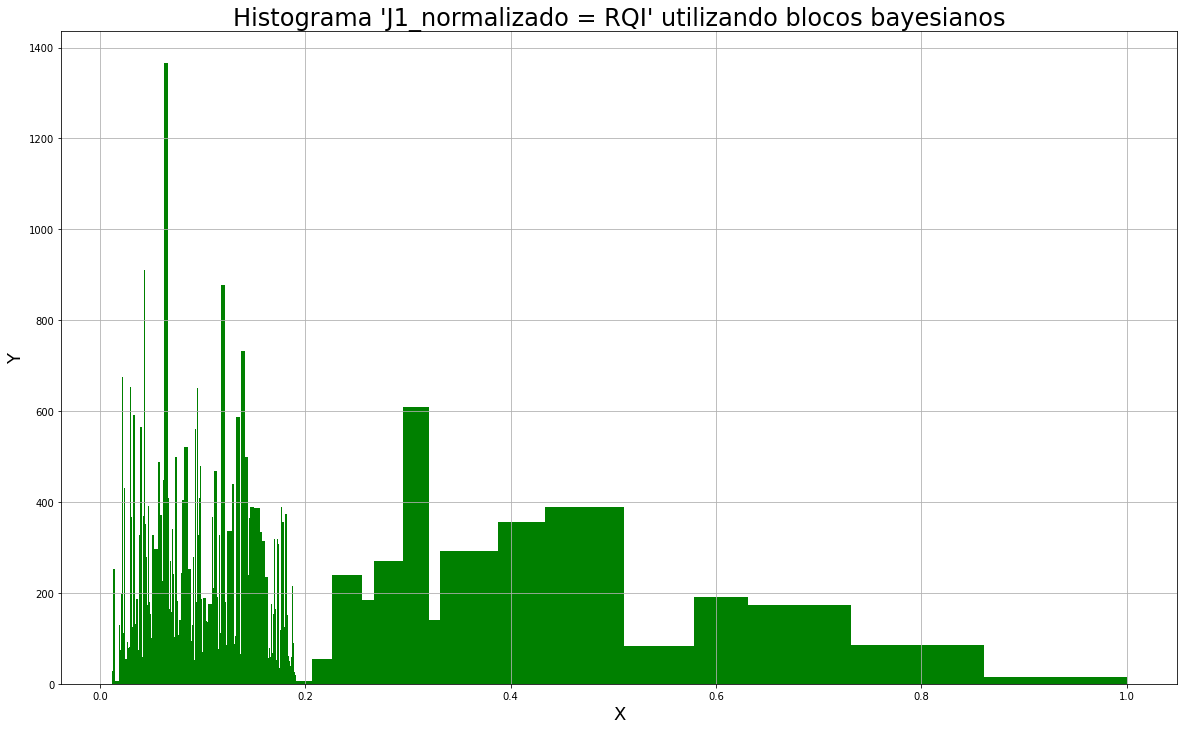

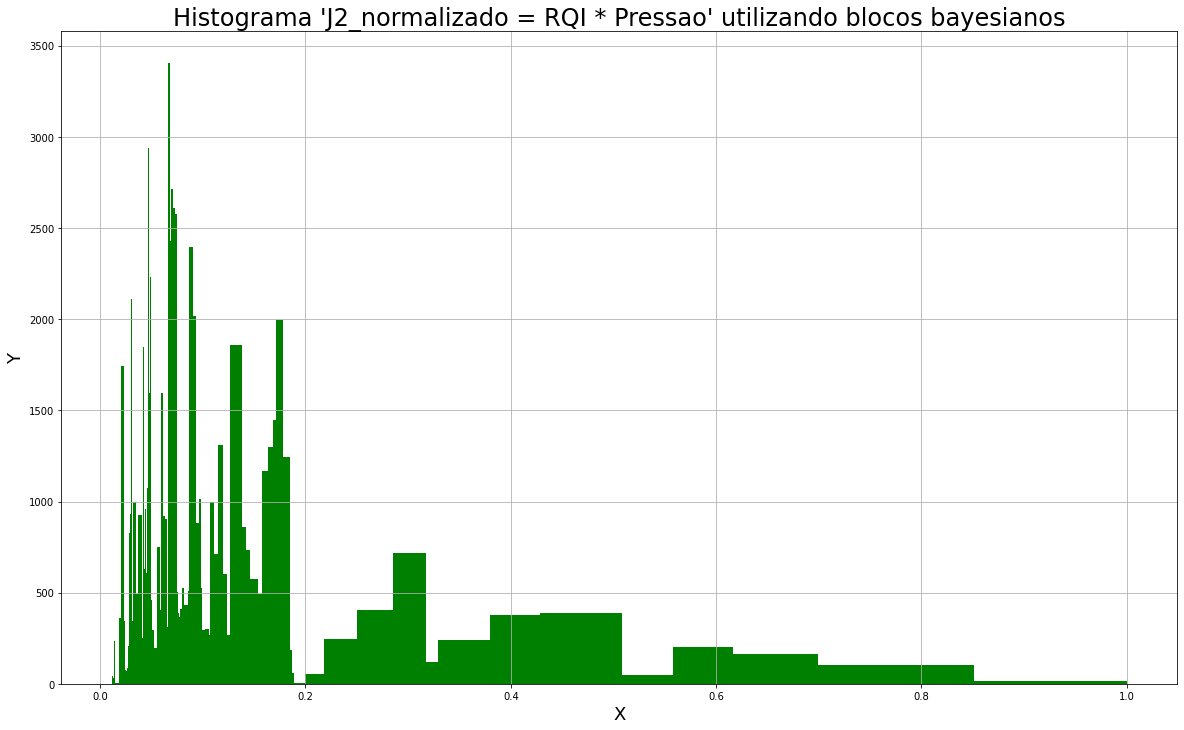

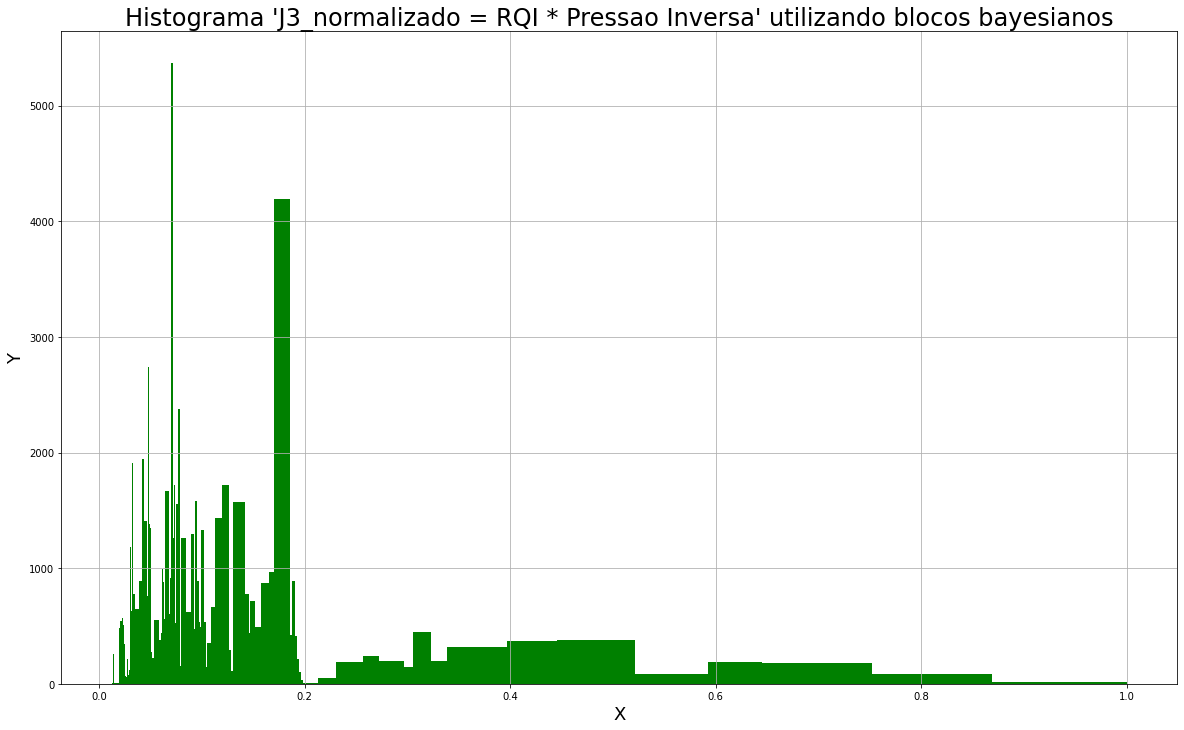

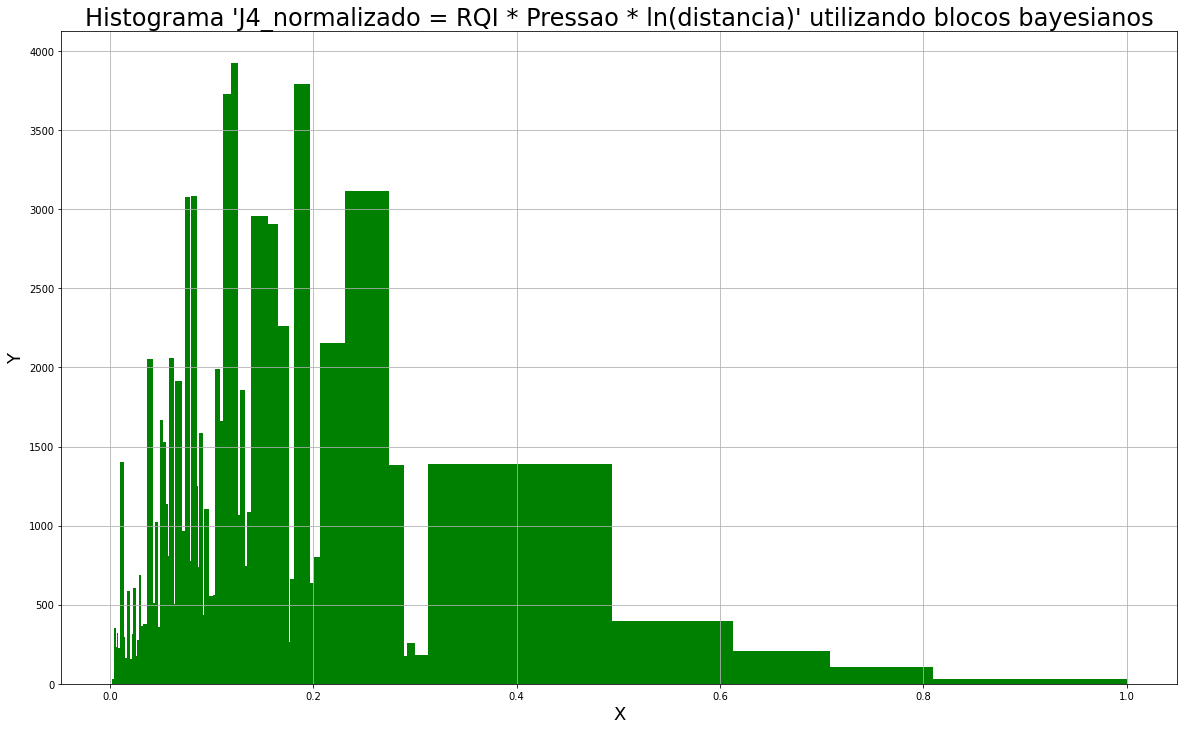

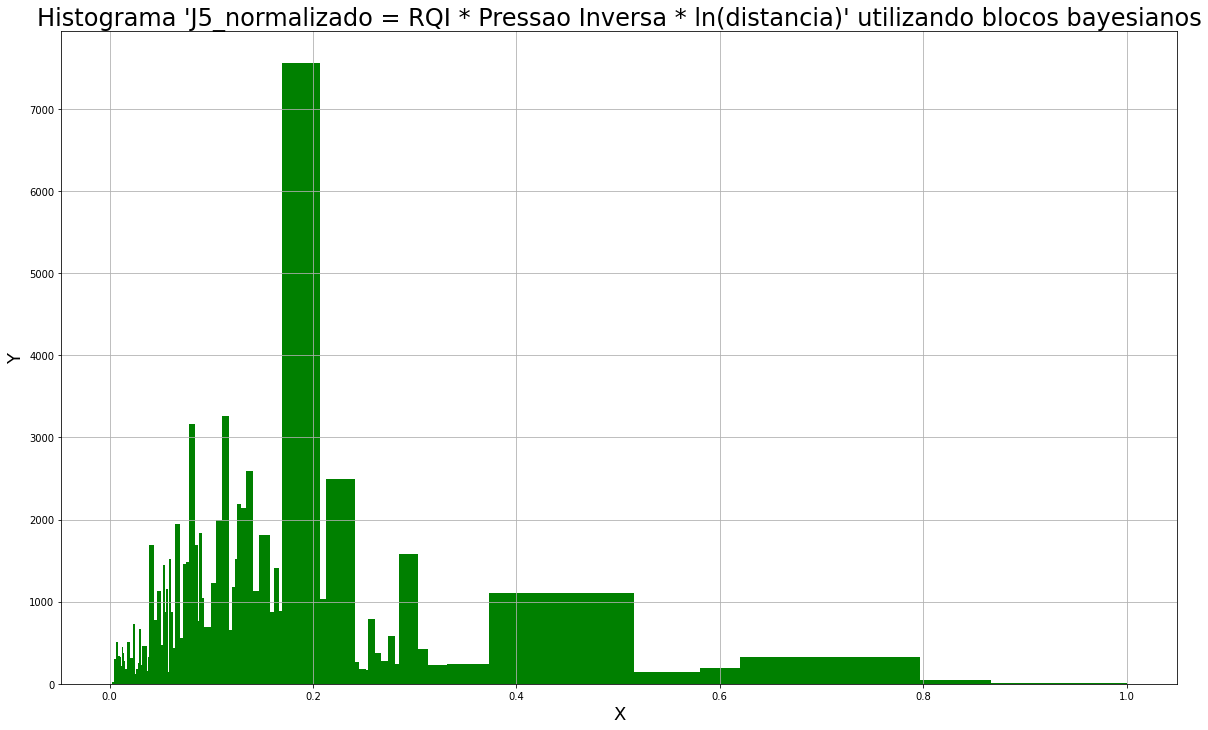

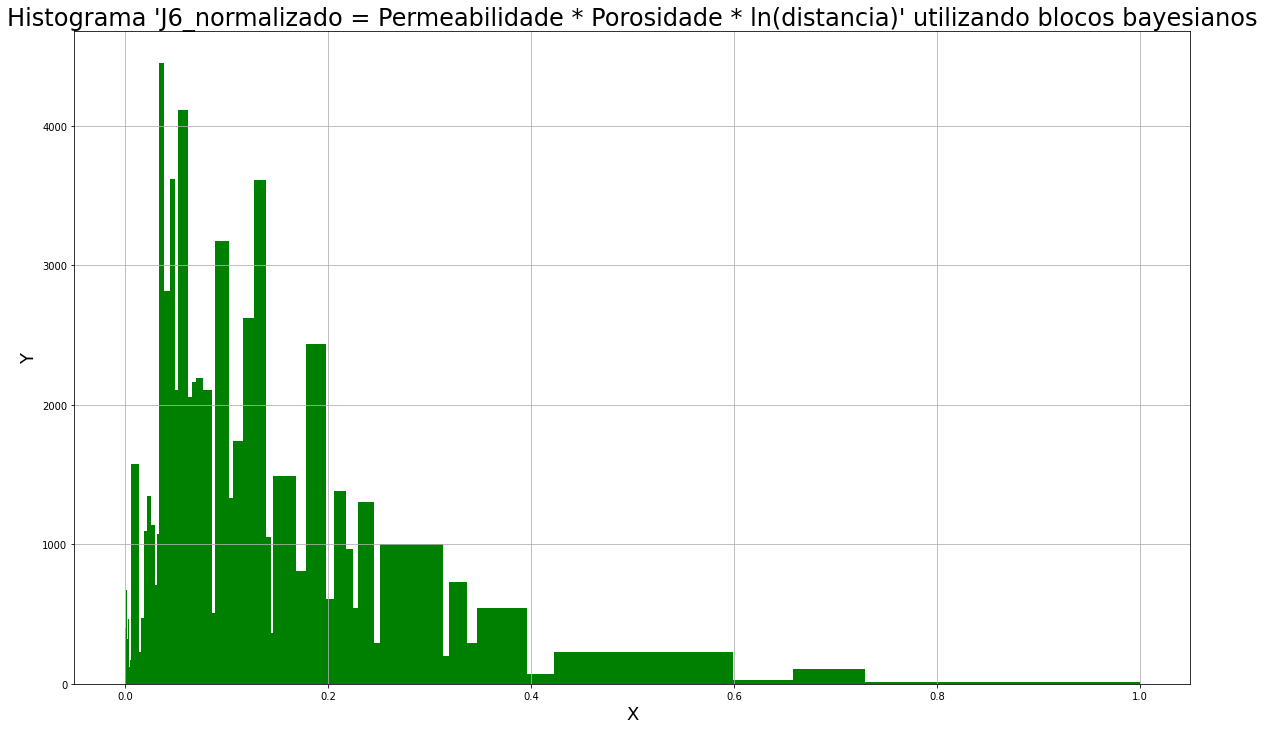

In [14]:
resultados = {}

for coluna in variaveis_df.columns:
    if coluna in variaveis_df.columns[12::]:
        serie = variaveis_df.query(f"{coluna} > 0")[coluna]
        resultados[coluna] = [serie, bayesian_blocks(serie)]
        grafico_bb(resultados[coluna][0], resultados[coluna][1], coluna)

## 8 - Processamento de Data com Binização (binning)

Vamos realizar uma classificação das colunas nomalizadas.

As colunas precisam encontrar o total de bins (binning) ideal para elas.

In [26]:
#pegando valores maximos e minimos do J1
min_value = variaveis_df['J1_normalizado'].min()
max_value = variaveis_df['J1_normalizado'].max()
print(min_value)
print(max_value)

0.011851811136921795
1.0


In [27]:
#vamos começar separando em 3 grupos/classes (bins)
#usamos linspace para calcular 4 bins que se distribuem igualmente
bins = np.linspace(min_value,max_value,4)
bins

array([0.01185181, 0.34123454, 0.67061727, 1.        ])

In [28]:
labels = ['classe 1', 'classe 2', 'classe 3']

(array([84227.,  1500.,   205.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

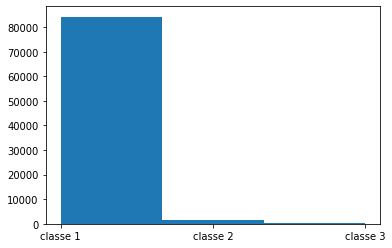

In [29]:

variaveis_df['bins'] = pd.cut(variaveis_df['J1_normalizado'], bins=bins, labels=labels, include_lowest=True)
plt.hist(variaveis_df['bins'], bins=3)

In [ ]:
'''
#J2
min_value = variaveis_df['J2_normalizado'].min()
max_value = variaveis_df['J2_normalizado'].max()
bins = np.linspace(min_value,max_value,4)
labels = ['classe 1', 'classe 2', 'classe 3']
variaveis_df['bins'] = pd.cut(variaveis_df['J2_normalizado'], bins=bins, labels=labels, include_lowest=True)
plt.hist(variaveis_df['bins'], bins=3)
'''

In [ ]:
'''
#J3
min_value = variaveis_df['J3_normalizado'].min()
max_value = variaveis_df['J3_normalizado'].max()
bins = np.linspace(min_value,max_value,4)
labels = ['classe 1', 'classe 2', 'classe 3']
variaveis_df['bins'] = pd.cut(variaveis_df['J3_normalizado'], bins=bins, labels=labels, include_lowest=True)
plt.hist(variaveis_df['bins'], bins=3)
'''

(array([84169.,  1534.,   229.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

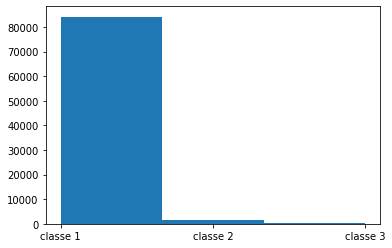

In [24]:
#binning pela frequencia 
variaveis_df['bin_qcut'] = pd.qcut(variaveis_df['J1_normalizado'], q=3, precision=1, labels=labels)
plt.hist(variaveis_df['bins'], bins=3)

In [58]:
#sampling - agrupa valores similares ou continuos
from scipy.stats import binned_statistic
x_data = np.arange(0, len(variaveis_df))
y_data = variaveis_df['J1_normalizado']
#binned_statistic retorna o valor dos bins e suas "bordas"
x_bins, bin_edges, misc = binned_statistic(y_data,y_data, statistic="mean", bins=2)

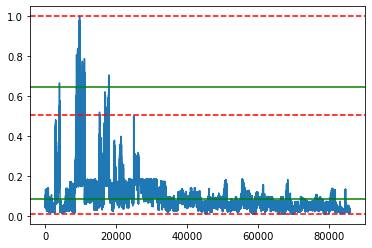

In [59]:

plt.plot(y_data)
plt.axhline(y=bin_edges[0], c='red', ls='--')
plt.axhline(y=bin_edges[1], c='red', ls='--')
plt.axhline(y=bin_edges[2], c='red', ls='--')

plt.axhline(y=x_bins[0], c='green', ls='-')
plt.axhline(y=x_bins[1], c='green', ls='-')
plt.show()

In [ ]:
plt.axhline(y=bin_edges[0])

In [49]:
bin_edges

array([0.01185181, 0.50592591, 1.        ])

In [44]:
#colocamos os 
bin_intervals = pd.IntervalIndex.from_arrays(bin_edges[:-1], bin_edges[1:])

In [45]:
def set_to_median(x, bin_intervals):
    for interval in bin_intervals:
        if x in interval:
            return interval.mid

In [46]:
variaveis_df['J1_normalizado_teste'] = variaveis_df['J1_normalizado'].apply(lambda x: set_to_median(x, bin_intervals))

<function matplotlib.pyplot.show(close=None, block=None)>

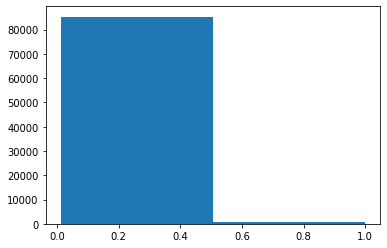

In [51]:
plt.hist(variaveis_df['J1_normalizado'], bins=2)
plt.show

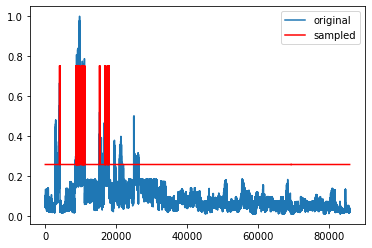

In [47]:
plt.plot(variaveis_df['J1_normalizado'], label='original')
plt.plot(variaveis_df['J1_normalizado_teste'], color='red', label='sampled')
plt.legend()
plt.show()

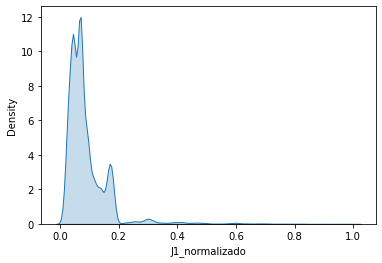

In [10]:
#teste
sns.kdeplot(variaveis_df.J1_normalizado, shade=True); #densidade

<AxesSubplot:xlabel='J1_normalizado', ylabel='porosidade'>

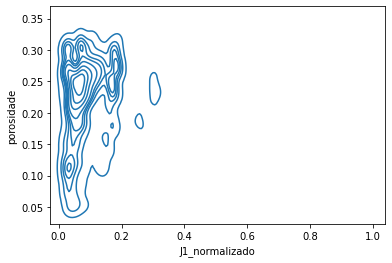

In [17]:
#teste
sns.kdeplot(variaveis_df.J1_normalizado, variaveis_df.porosidade) #densidade x porosidade